# Imports

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for simulation
from MMn import simulate_MMn
from MMn_SJF import simulate_MMn_SJF
from MDn import simulate_MDn
from MLn import simulate_MLn

# Functions used for analysis
from Analysis import *
from ExpectedWaitTime import expectedWait
from scipy.stats import f_oneway

# Constant Parameters

In [63]:
customers = 3000000
mu = 1
p = 0.75

# For multiple rho's and multiple servers
ns = [1, 2, 4, 8]
rhos = np.linspace(0.8, 0.95, 10)

# Problem 2.1: Expected vs Measured  

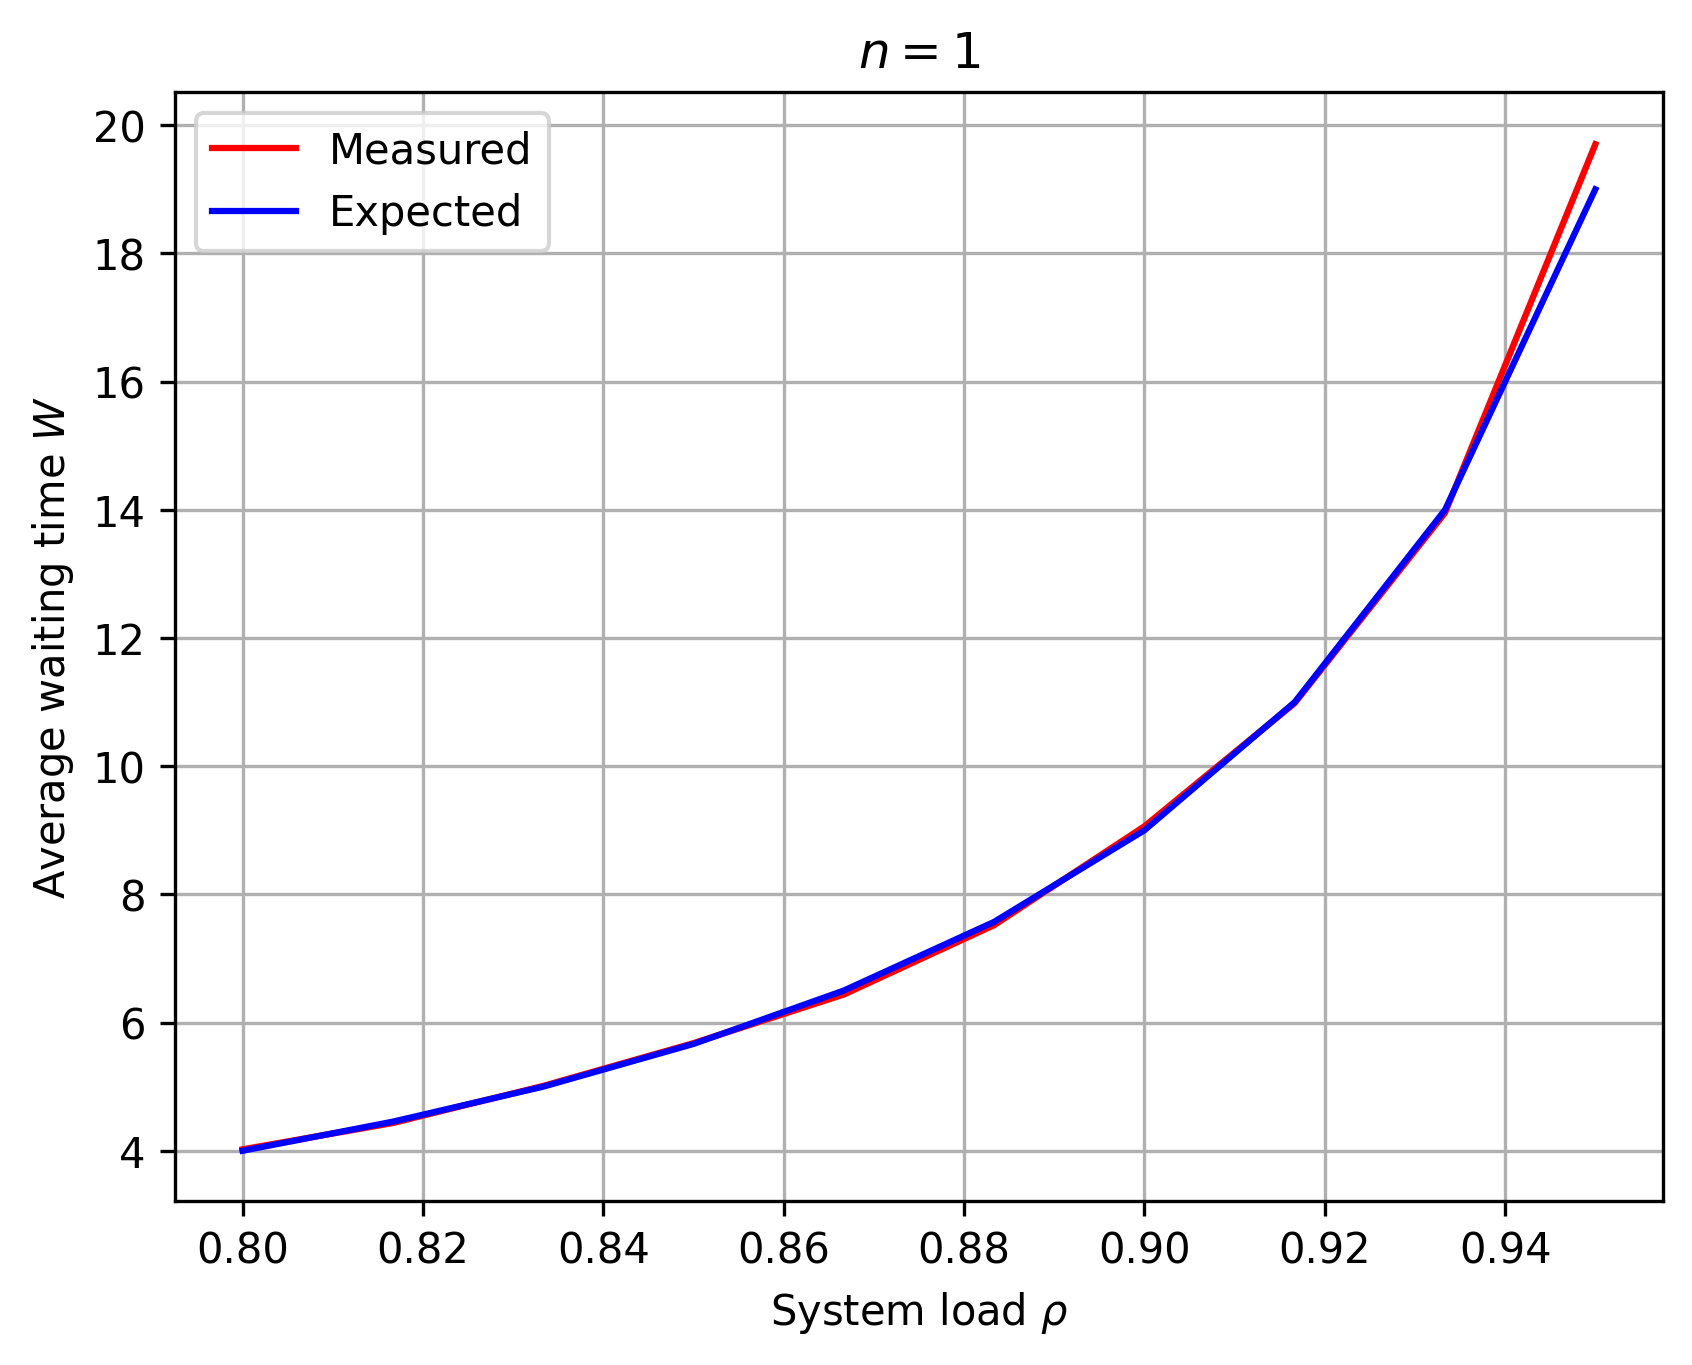

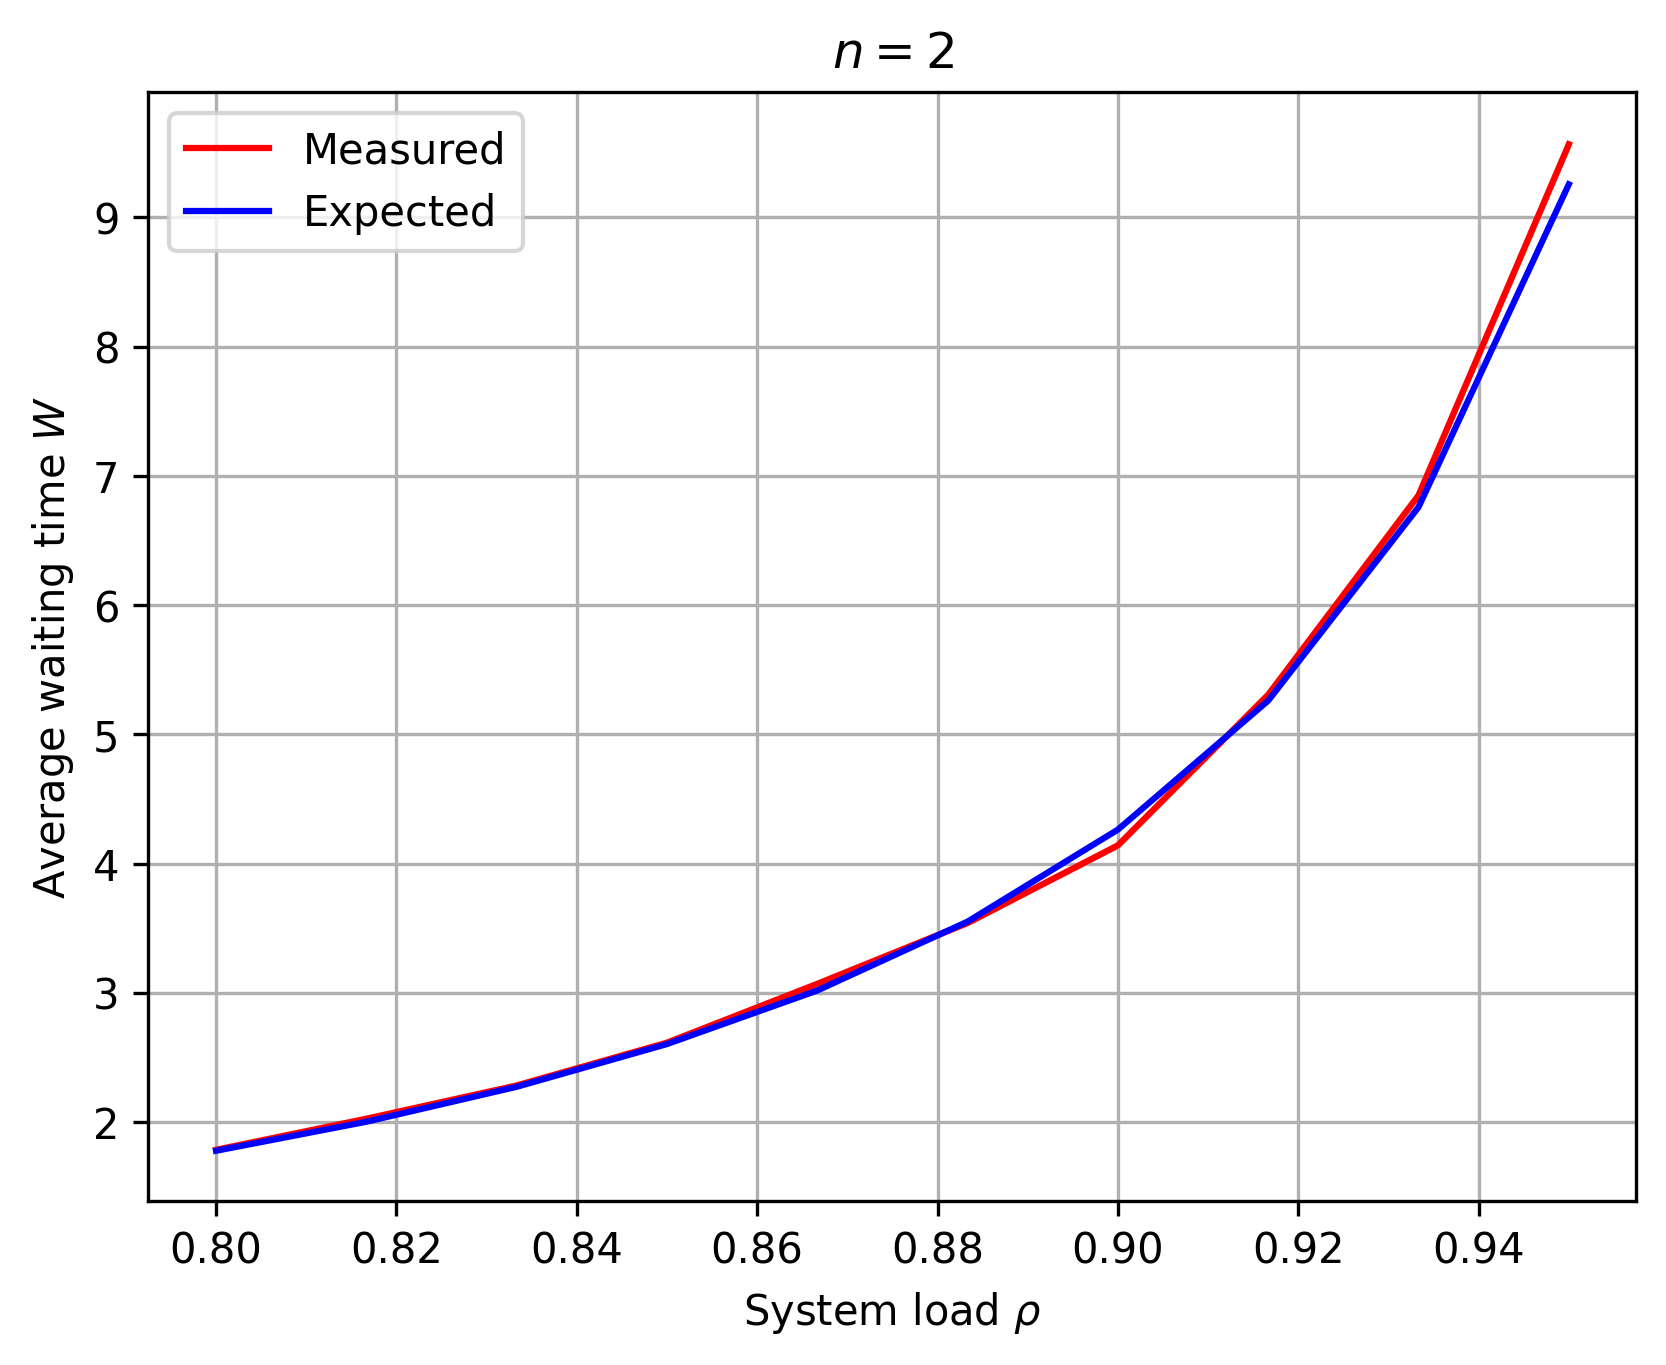

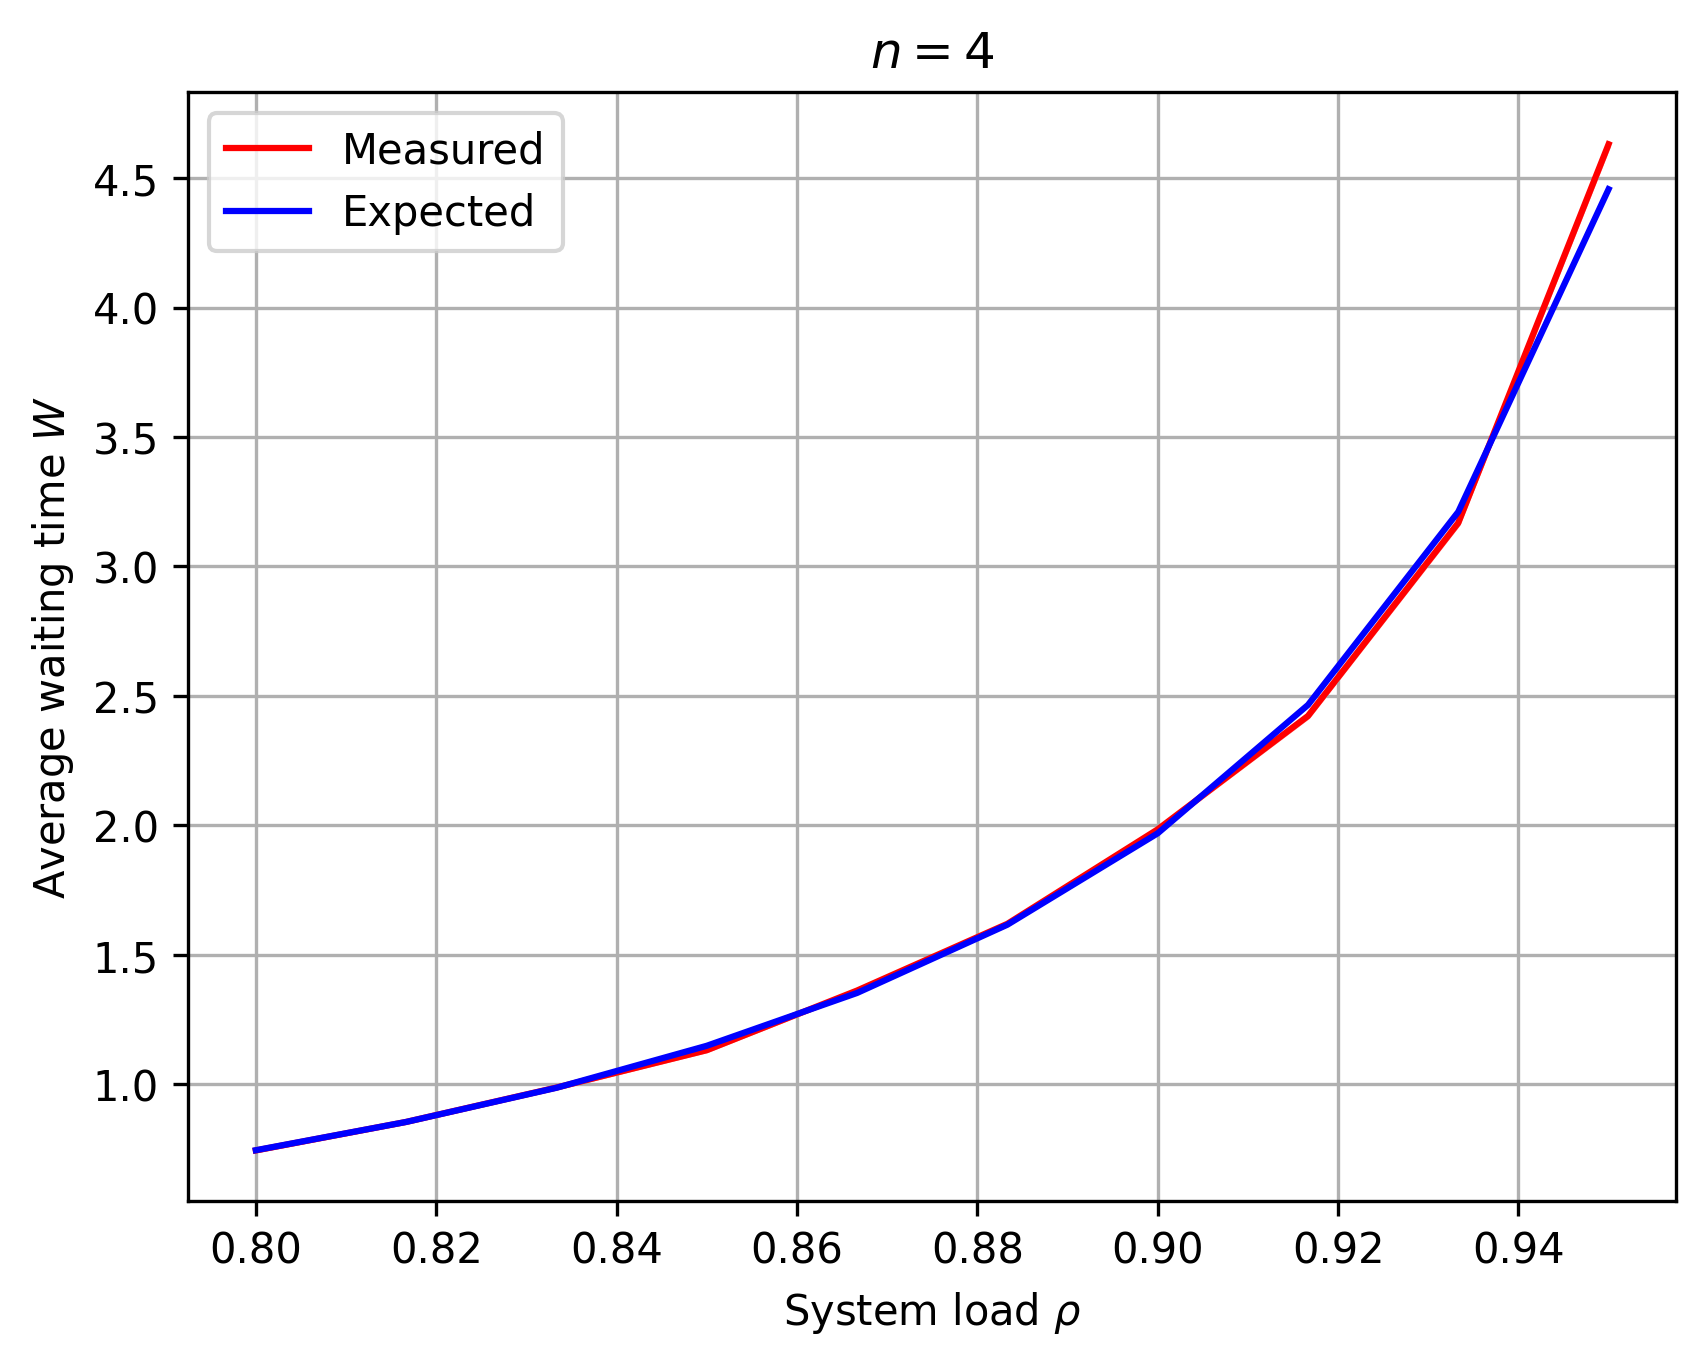

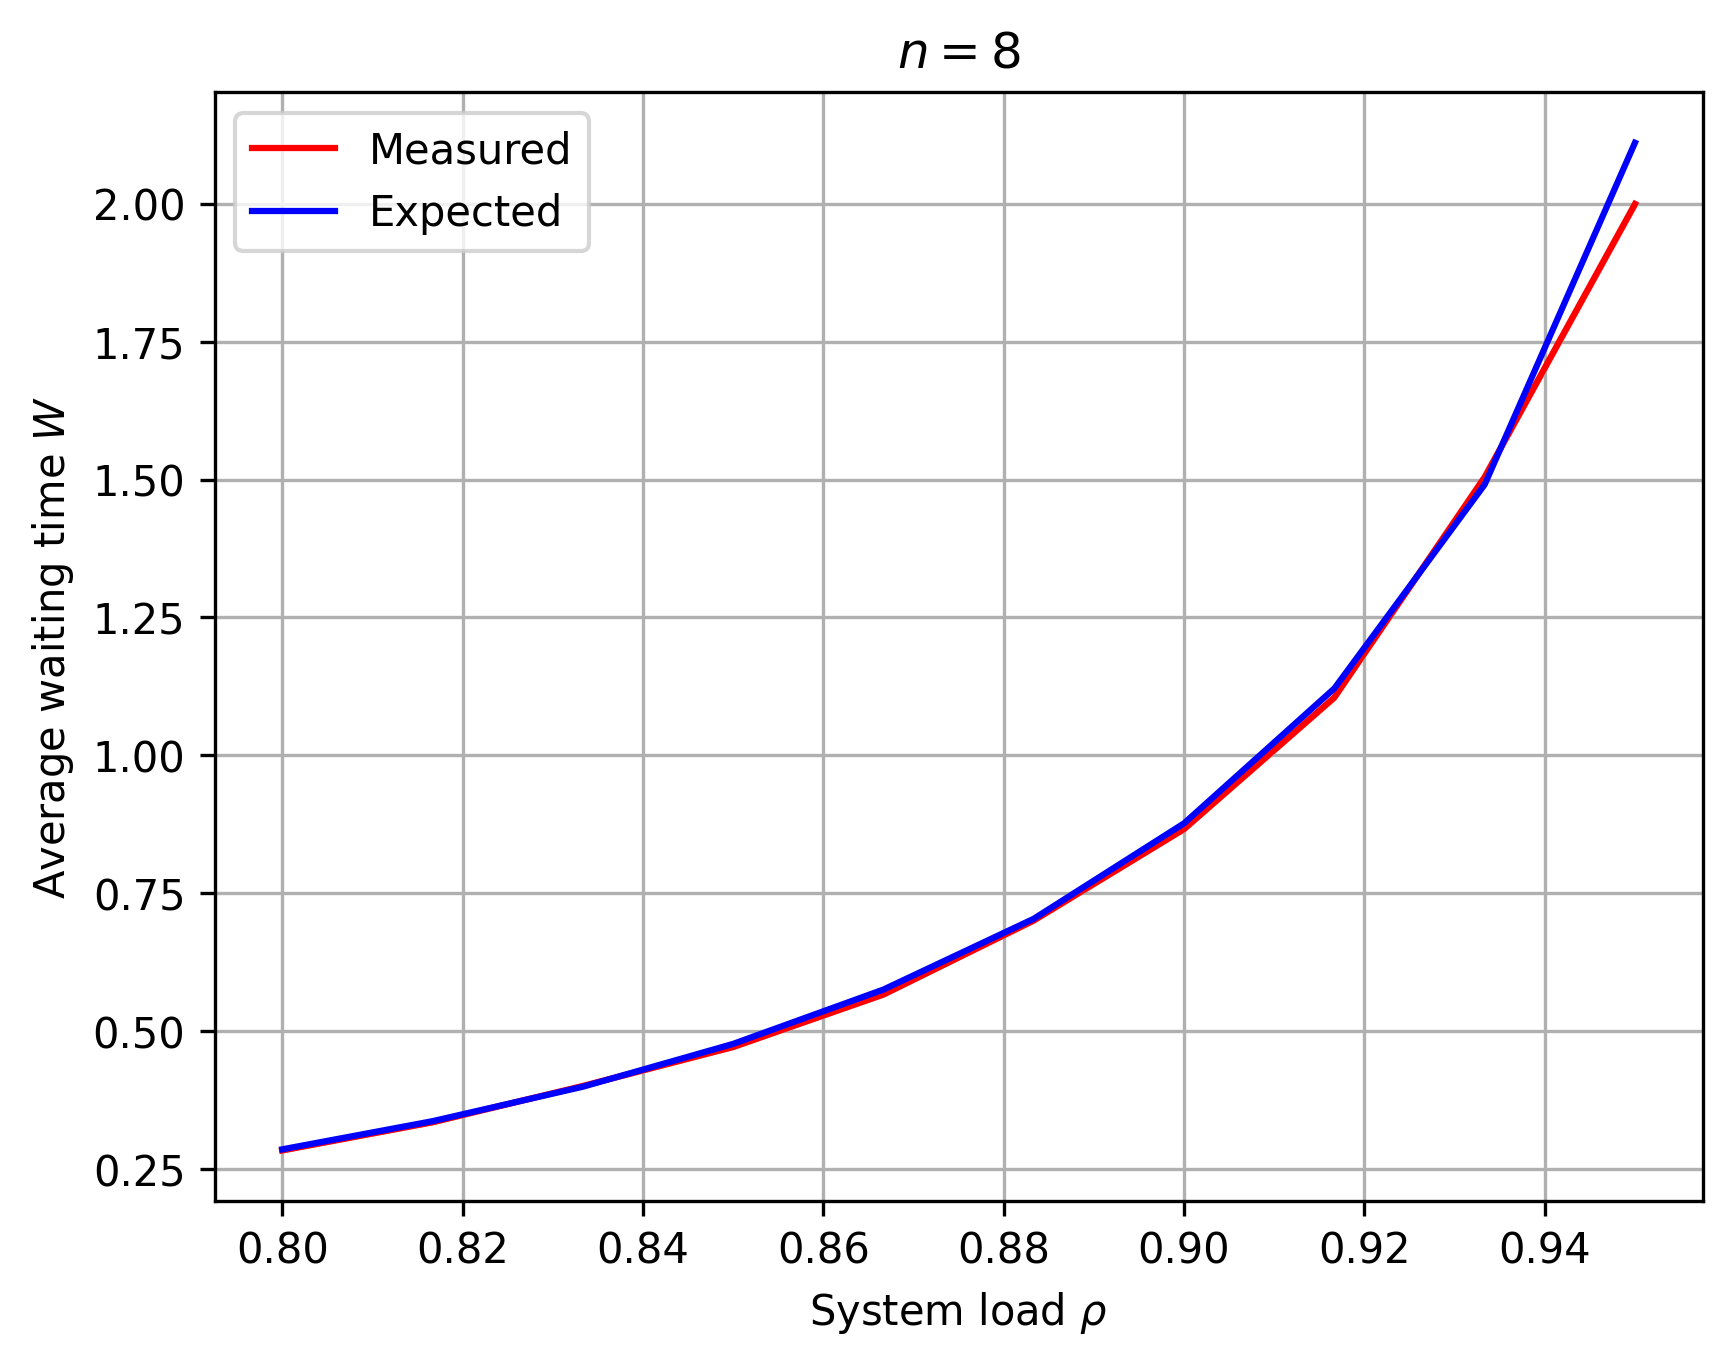

In [7]:
for n in ns:
    # Create figure
    fig, ax = plt.subplots()
    fig.dpi = 300
    
    # Lists used to store results
    results = []
    
    # Lists used to store results
    for rho in rhos:
        # Simulate system
        waiting = simulate_MMn(customers, rho, mu, n)
        
        # Get average and confidence
        avg, conf = statistics(waiting, print_info=False)
        
        # Expected waiting time
        expected = expectedWait(rho, mu, n)
        
        # Add to results
        results.append([avg, conf, expected])
    
    # Convert to numpy array
    results = np.array(results)
    
    # Save results
    np.savetxt(f'results/MM{n}_FIFO.txt', results)
    
    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]
    
    # Plotting
    ax.plot(rhos, results[:, 0], label='Measured', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)
    ax.plot(rhos, results[:, 2], color='blue', label='Expected')
    
    # Plot settings
    ax.legend()
    ax.set_title(f'$n = {n}$')
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    fig.tight_layout()
    
    # Save figure
    fig.savefig(f'results/MM{n}.jpg', dpi=300)
        

# Problem 2.2: Convergence of waiting time

/tmp/ipykernel_1165/2712692772.py:19: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(var)


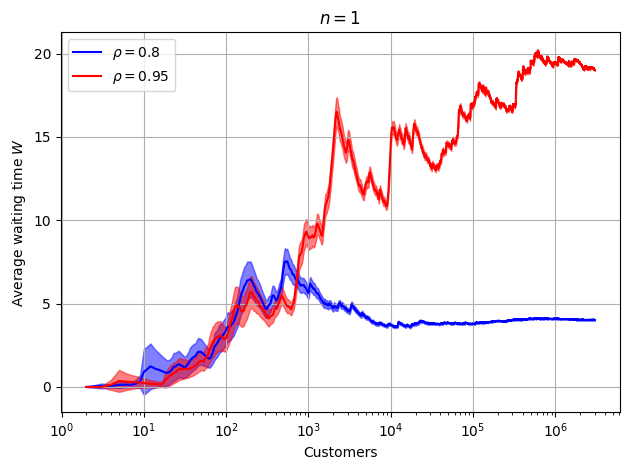

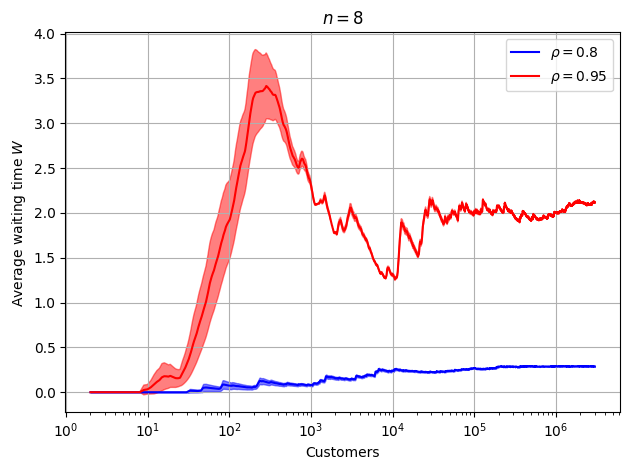

In [62]:
# Colors used for plots
colors = ['blue', 'red']

for n in [ns[0], ns[-1]]:
    # Create figure
    fig, ax = plt.subplots()
    ax.set_title(f'$n = {n}$')
    for i, rho in enumerate([rhos[0], rhos[-1]]):
        # Get waiting array
        waiting = simulate_MMn(customers, rho, mu, n)
        waiting = np.array(waiting)
        
        # Calculate average
        N = np.arange(1, customers + 1)
        average = np.cumsum(waiting) / N
        
        # Calculate variance and std
        var = (np.cumsum(waiting**2) + N * average**2 - 2 * average * np.cumsum(average))[1:] / (N[1:] - 1)
        std = np.sqrt(var)

        # Start from 2 customers
        average = average[1:]
        N = N[1:]


        # Compute confidence interval
        conf = 1.96 * std / np.sqrt(N)
        
        # Left and right interval
        left = average - conf
        right = average + conf
        
        # Plotting
        ax.semilogx(N, average, label=f'$\\rho = {rho}$', color=colors[i])
        ax.fill_between(N, left, right, color=colors[i], alpha=0.5)
    
    # Figure settings
    ax.set_xlabel('Customers')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    ax.legend()
    fig.tight_layout()
    fig.savefig(f'results/CustomersVStime_{n}.jpg', dpi=300)
        

# Problem 2.3: Comparison

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

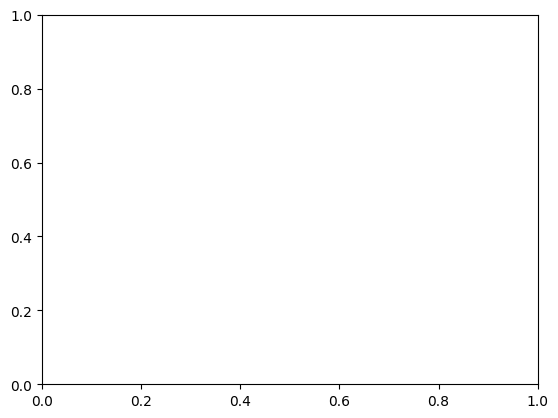

In [66]:
# Parameters
rhos2 = np.linspace(0.1, 0.95, 20)
customers2 = 100
simulations = 500

# List used to save results
cust = []

# Loop through simulations
for _ in range(simulations):
    res = []
    added = False
    for rho in rhos2:
        W1 = simulate_MMn(customers2, rho, 1, 1)
        W2 = simulate_MMn(customers2, rho, 1, 2)
        W4 = simulate_MMn(customers2, rho, 1, 4)
        W8 = simulate_MMn(customers2, rho, 1, 8)
        for i in range(len(W1), 1, -1):
            _, p = f_oneway(W1[:i], W2[:i], W4[:i], W8[:i])
            if p > 0.05:
                res.append(i)
                added = True
                break

        # Test was never accepted
        if not added:
            res.append(1)

    # Add to results
    cust.append(res)

# Convert to numpy array
cust = np.array(cust)

# Compute mean and confidence
mean = np.mean(cust, axis=0)
conf = np.std(cust, ddof=1, axis=0) * 1.96 / np.sqrt(simulations)

# Calculate intervals
left = mean - conf
right = mean + conf

# Plotting
plt.plot(rhos, mean, color='blue')
plt.fill_between(rhos, left, right, color='blue', alpha=0.5)
plt.grid()
plt.xlabel('$\\rho$')
plt.ylabel('$Customers$')
plt.tight_layout()
plt.savefig('results/ANOVAResults.jpg', dpi=300)


# Problem 3

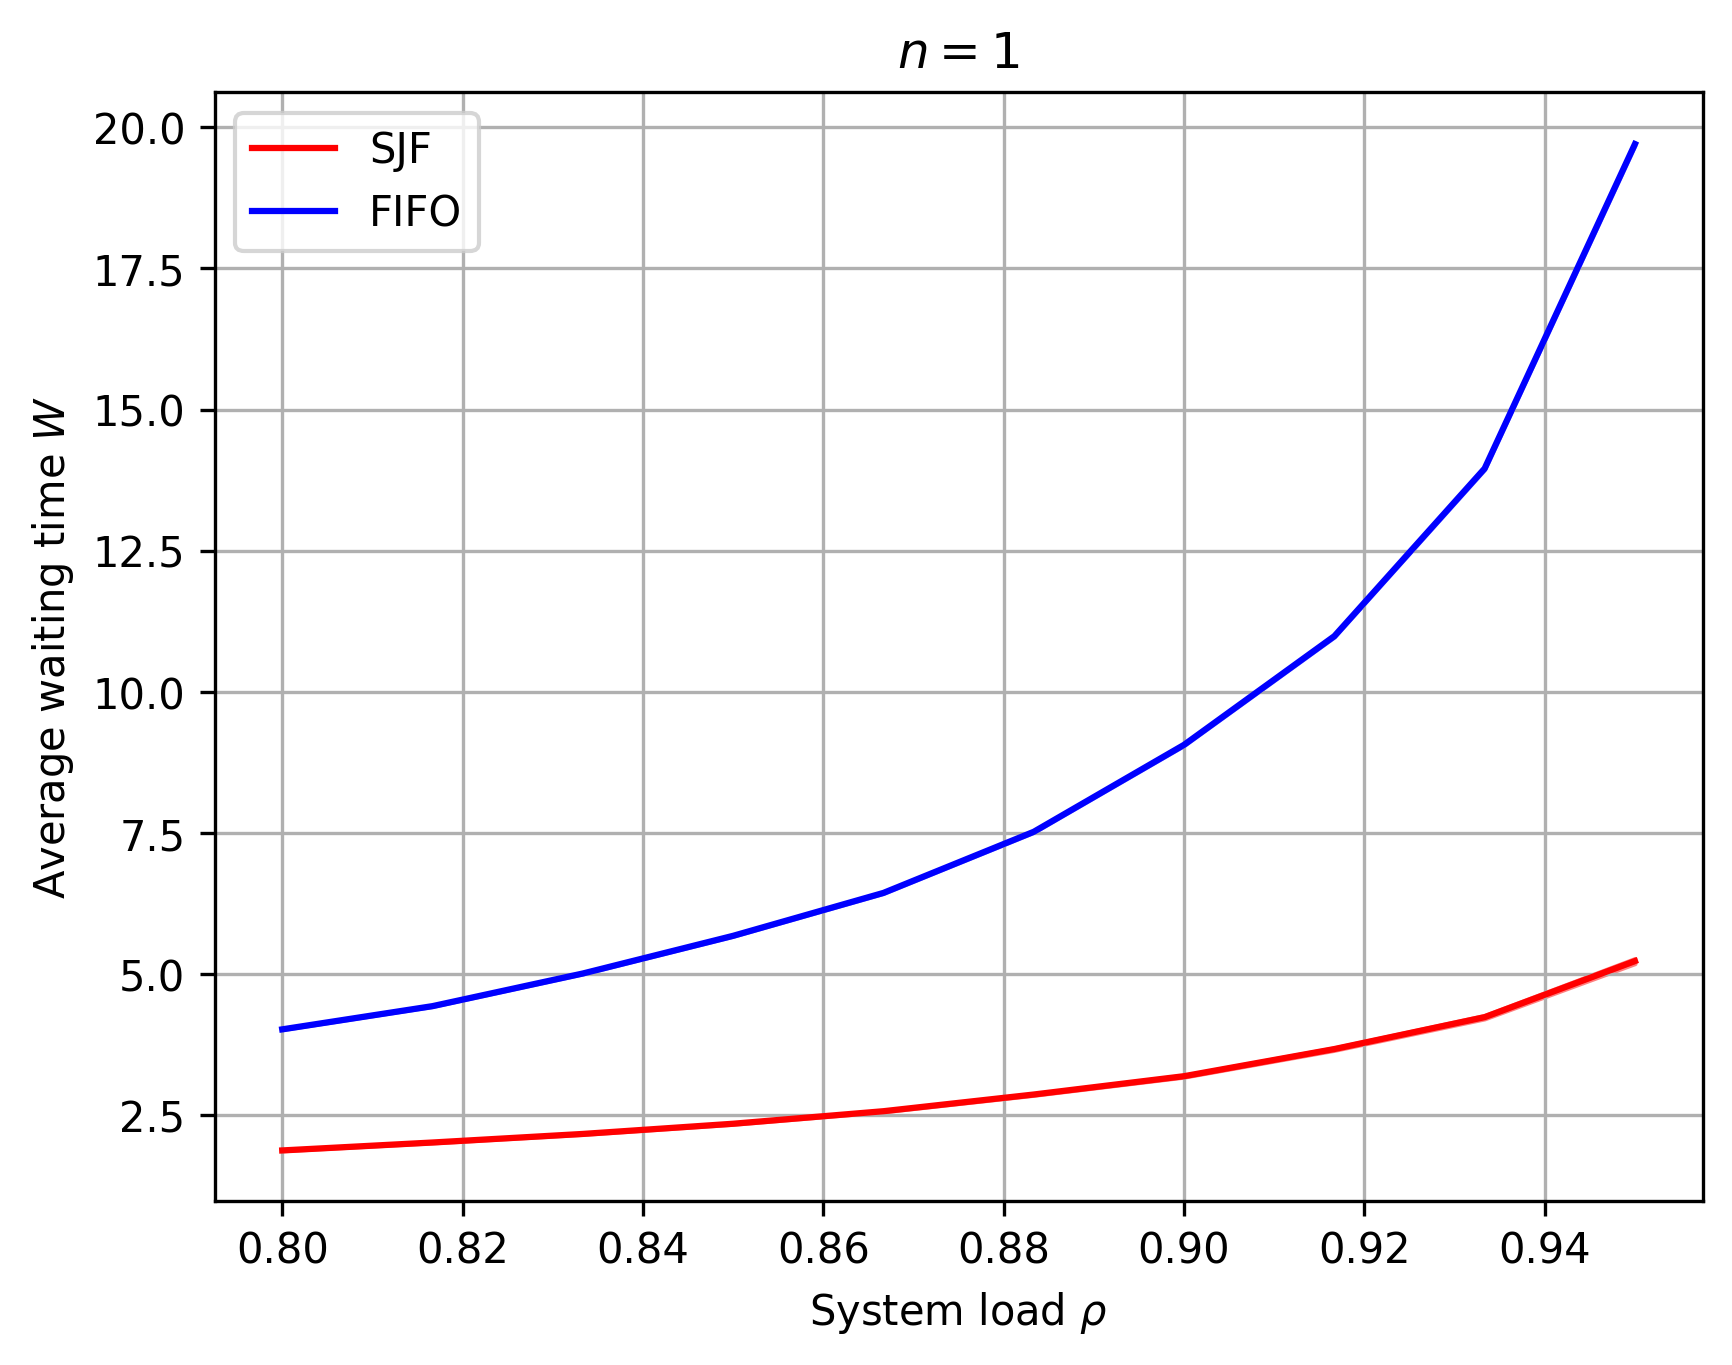

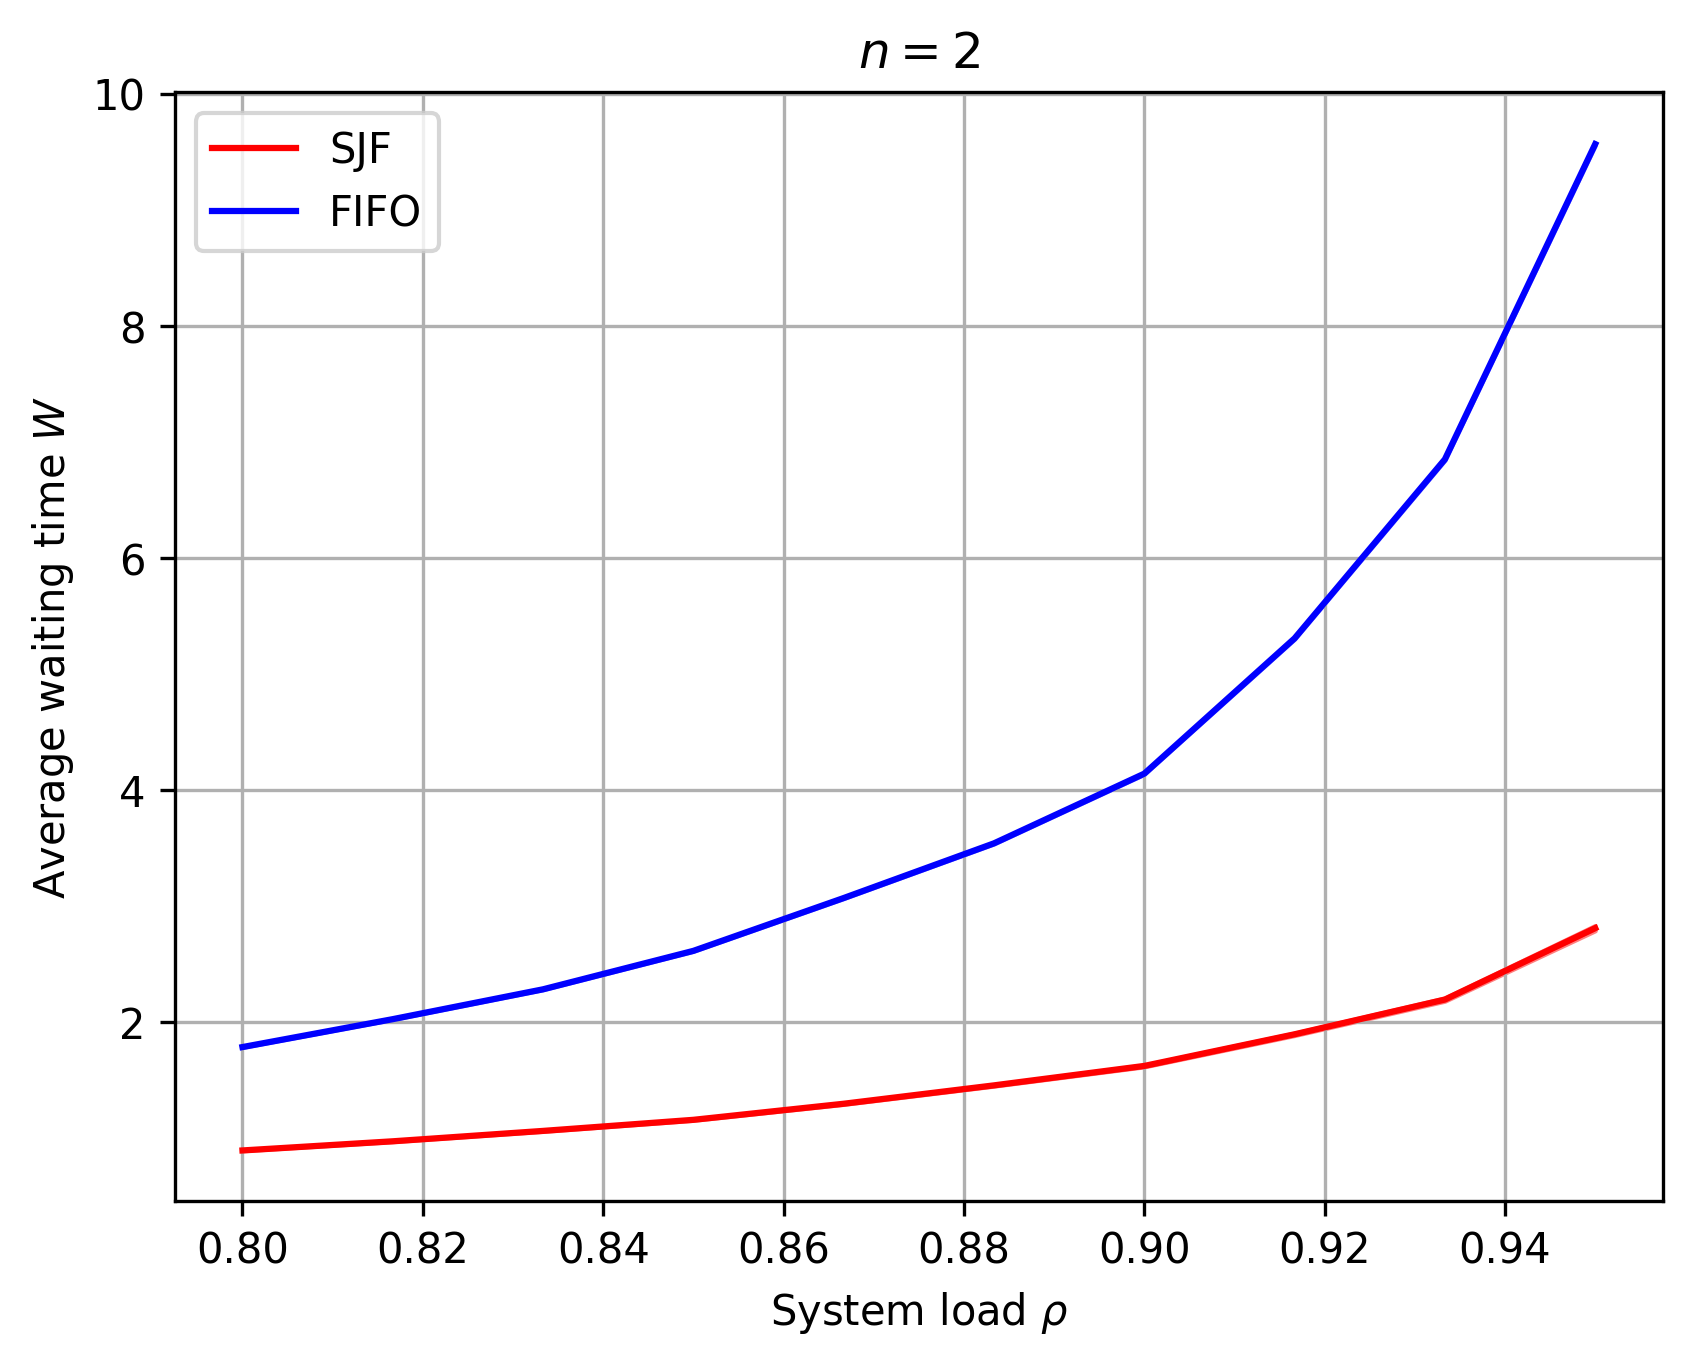

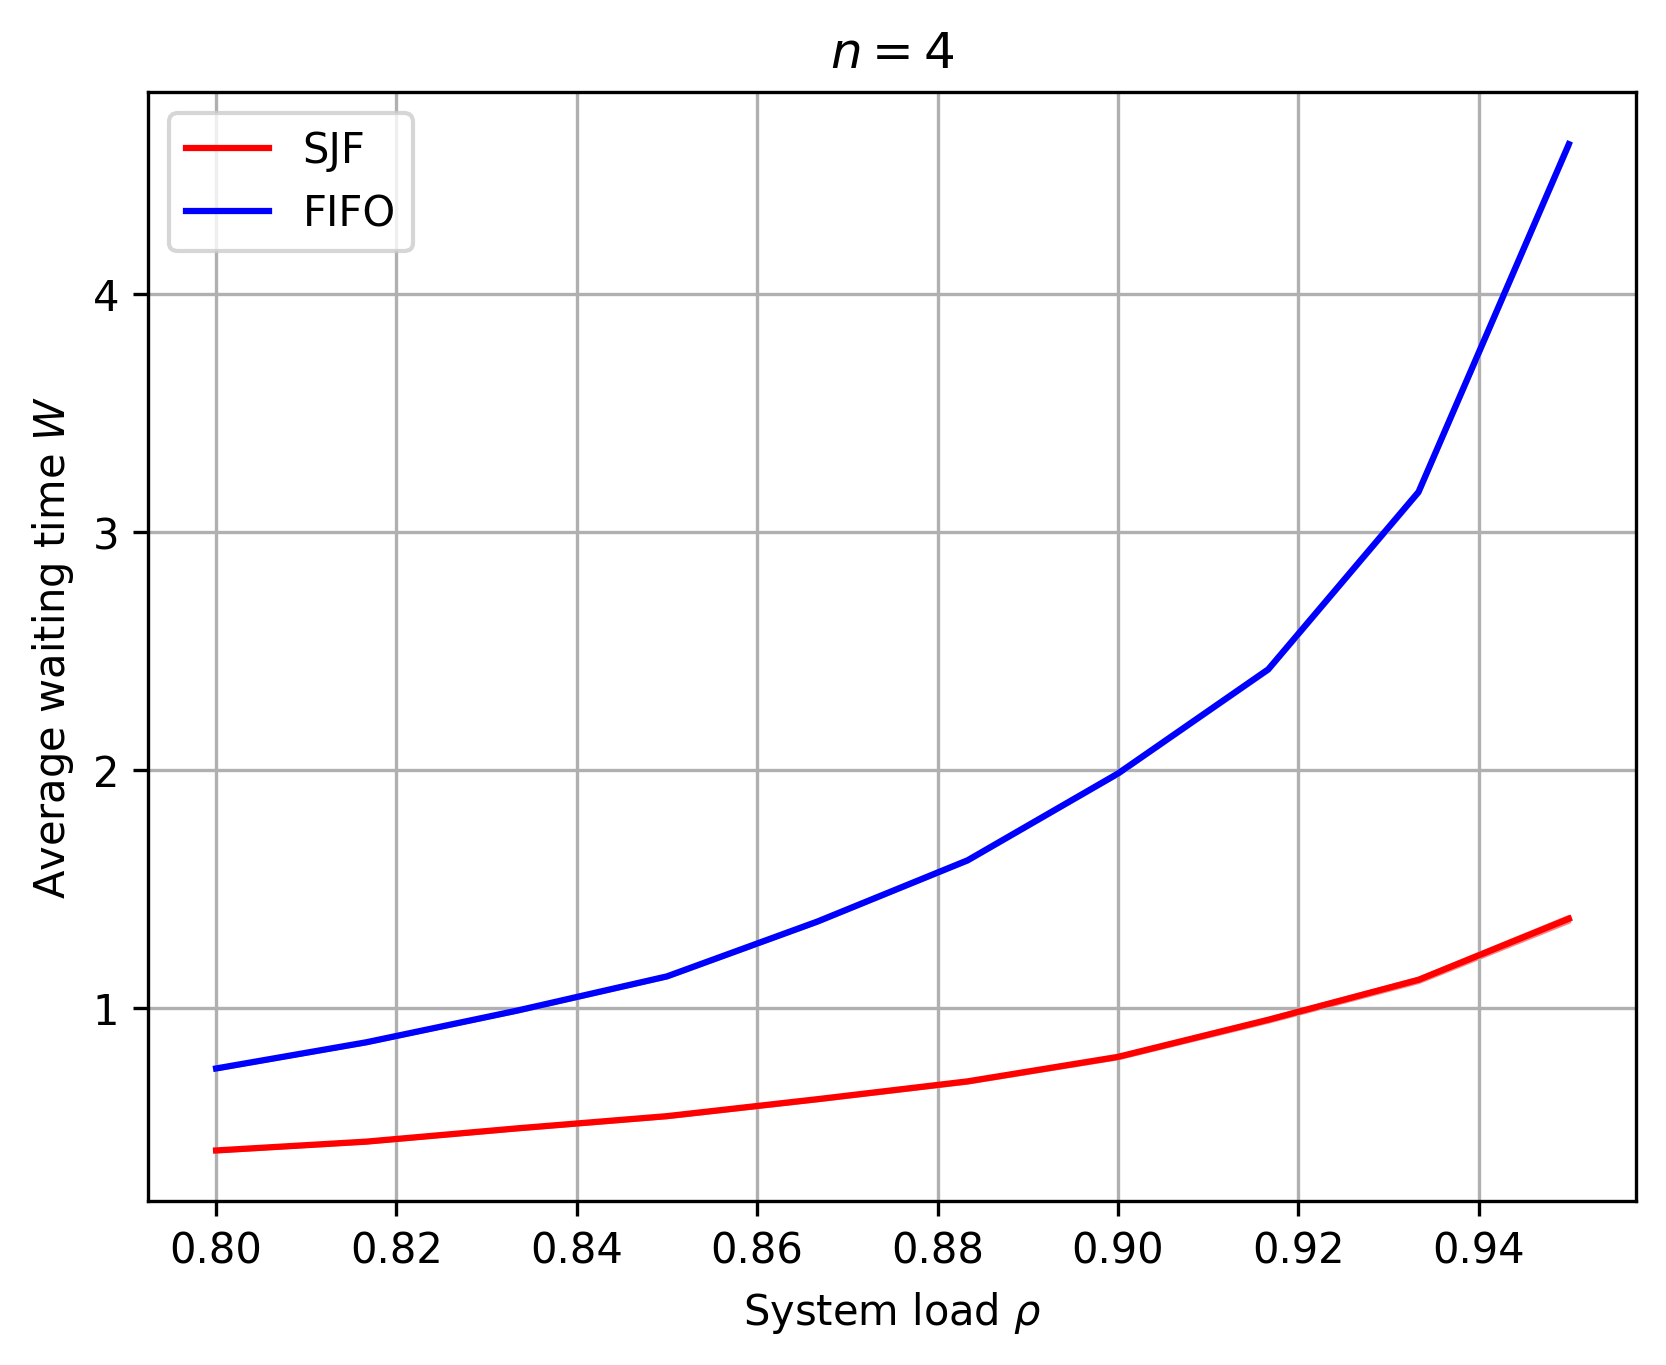

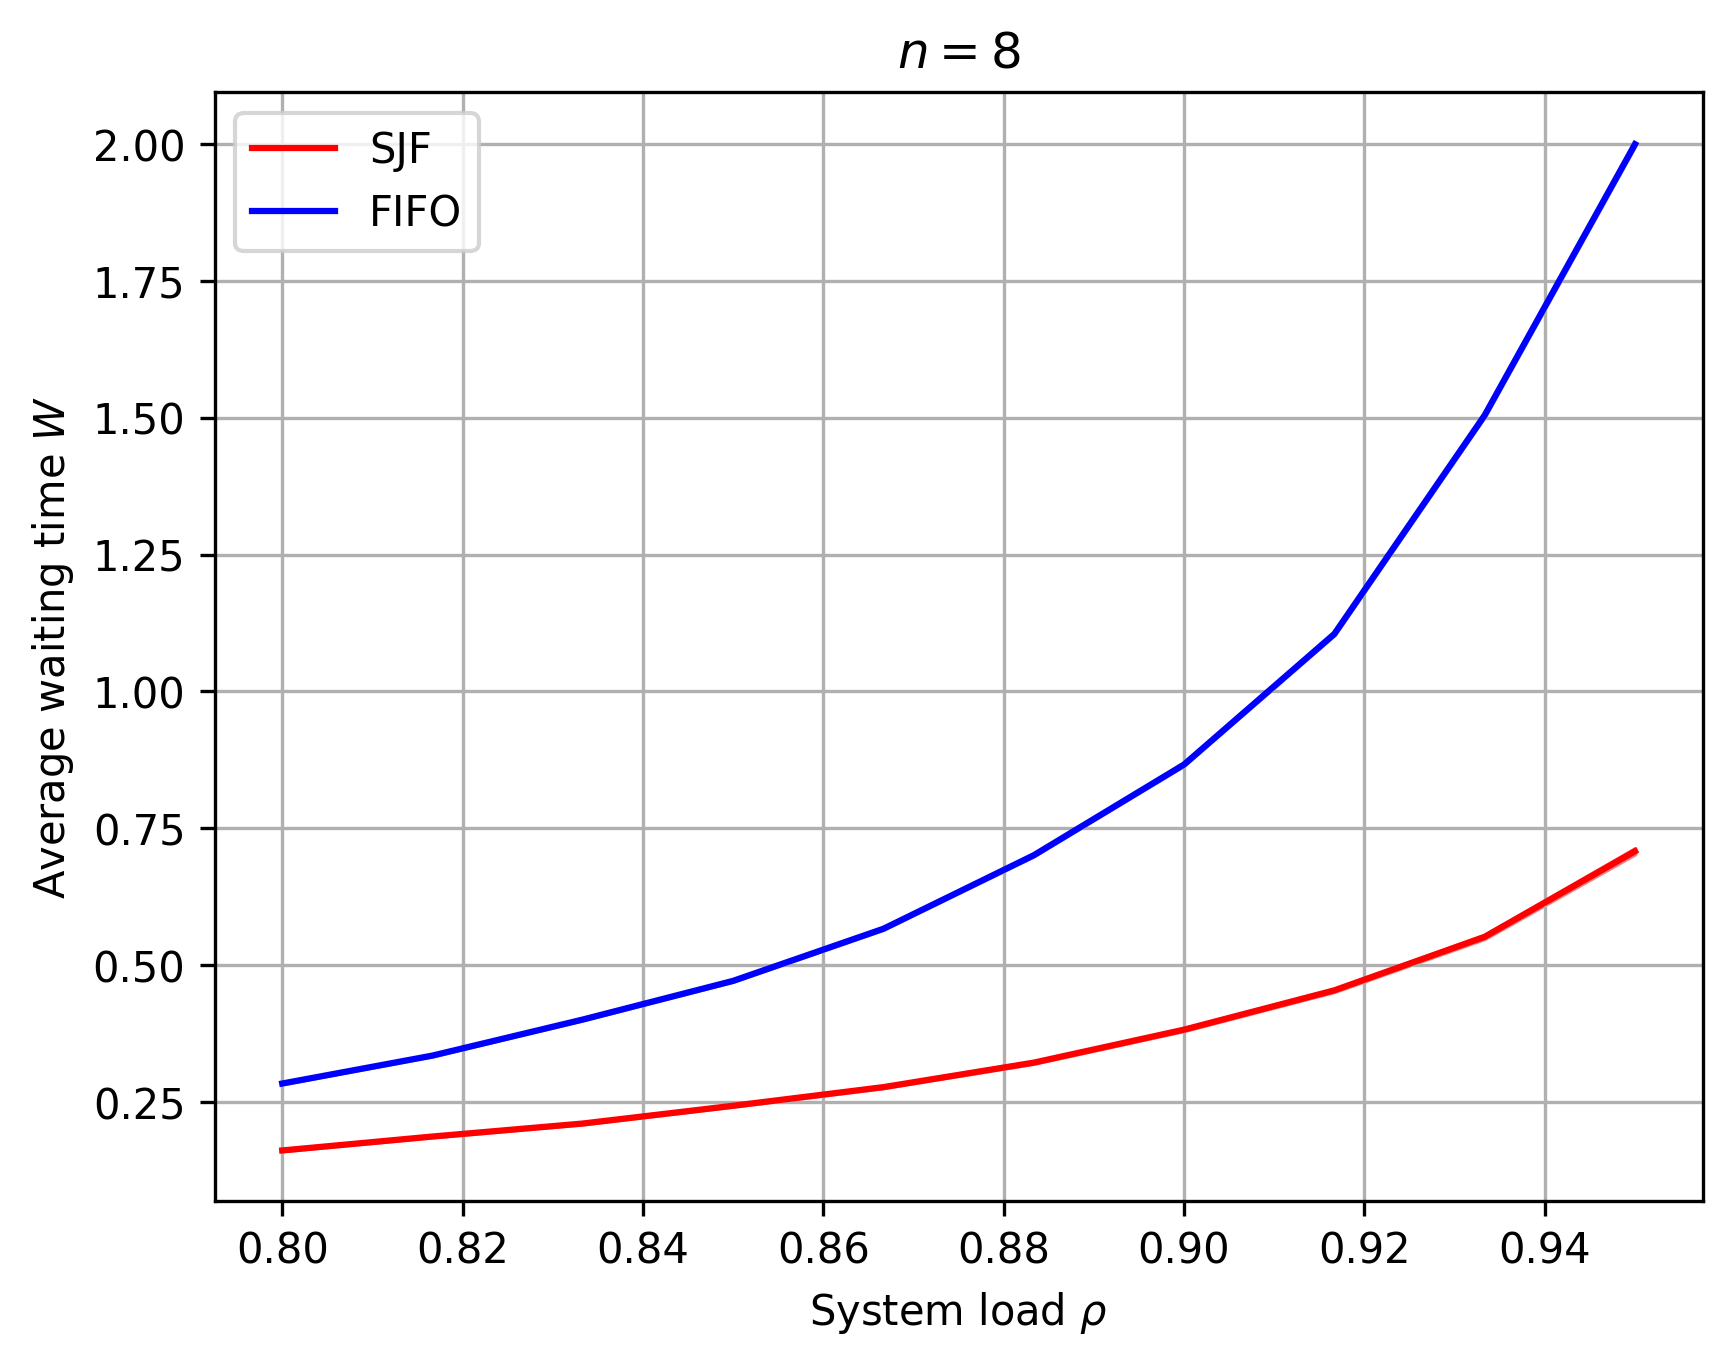

In [8]:
# Simulating SJF
for n in ns:
    # Create figure
    fig, ax = plt.subplots()
    fig.dpi = 300

    # Lists used to store results
    results = []

    # Lists used to store results
    for rho in rhos:
        # Simulate system
        waiting = simulate_MMn_SJF(customers, rho, mu, n)

        # Get average and confidence
        avg, conf = statistics(waiting, print_info=False)

        # Expected waiting time
        expected = expectedWait(rho, mu, n)

        # Add to results
        results.append([avg, conf, expected])

    # Convert to numpy array
    results = np.array(results)

    # Save results
    np.savetxt(f'results/MM{n}_SJF.txt', results)

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='SJF', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)
    
    # Loading results from FIFO
    results = np.loadtxt(f'results/MM{n}_FIFO.txt')

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='FIFO', color='blue')
    ax.fill_between(rhos, left, right, color='blue', alpha=0.5)

    # Plot settings
    ax.legend()
    ax.set_title(f'$n = {n}$')
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    fig.tight_layout()

    # Save figure
    fig.savefig(f'results/FIFOvsSJF_{n}.jpg', dpi=300)


# Problem 4.1: Determined distribution

In [ ]:
# Simulating for every n
for n in ns:
    # Create figure
    fig, ax = plt.subplots()
    fig.dpi = 300

    # Lists used to store results
    results = []

    # Lists used to store results
    for rho in rhos:
        # Simulate system
        waiting = simulate_MDn(customers, rho, mu, n)

        # Get average and confidence
        avg, conf = statistics(waiting, print_info=False)

        # Expected waiting time
        expected = expectedWait(rho, mu, n)

        # Add to results
        results.append([avg, conf, expected])

    # Convert to numpy array
    results = np.array(results)

    # Save results
    np.savetxt(f'results/MD{n}.txt', results)

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='M/D/n', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)

    # Loading results from FIFO
    results = np.loadtxt(f'results/MM{n}_FIFO.txt')

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='M/M/n', color='blue')
    ax.fill_between(rhos, left, right, color='blue', alpha=0.5)

    # Plot settings
    ax.legend()
    ax.set_title(f'$n = {n}$')
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    fig.tight_layout()

    # Save figure
    fig.savefig(f'results/MDNvsMMN_{n}.jpg', dpi=300)


# Problem 4.2: Hyper-exponential

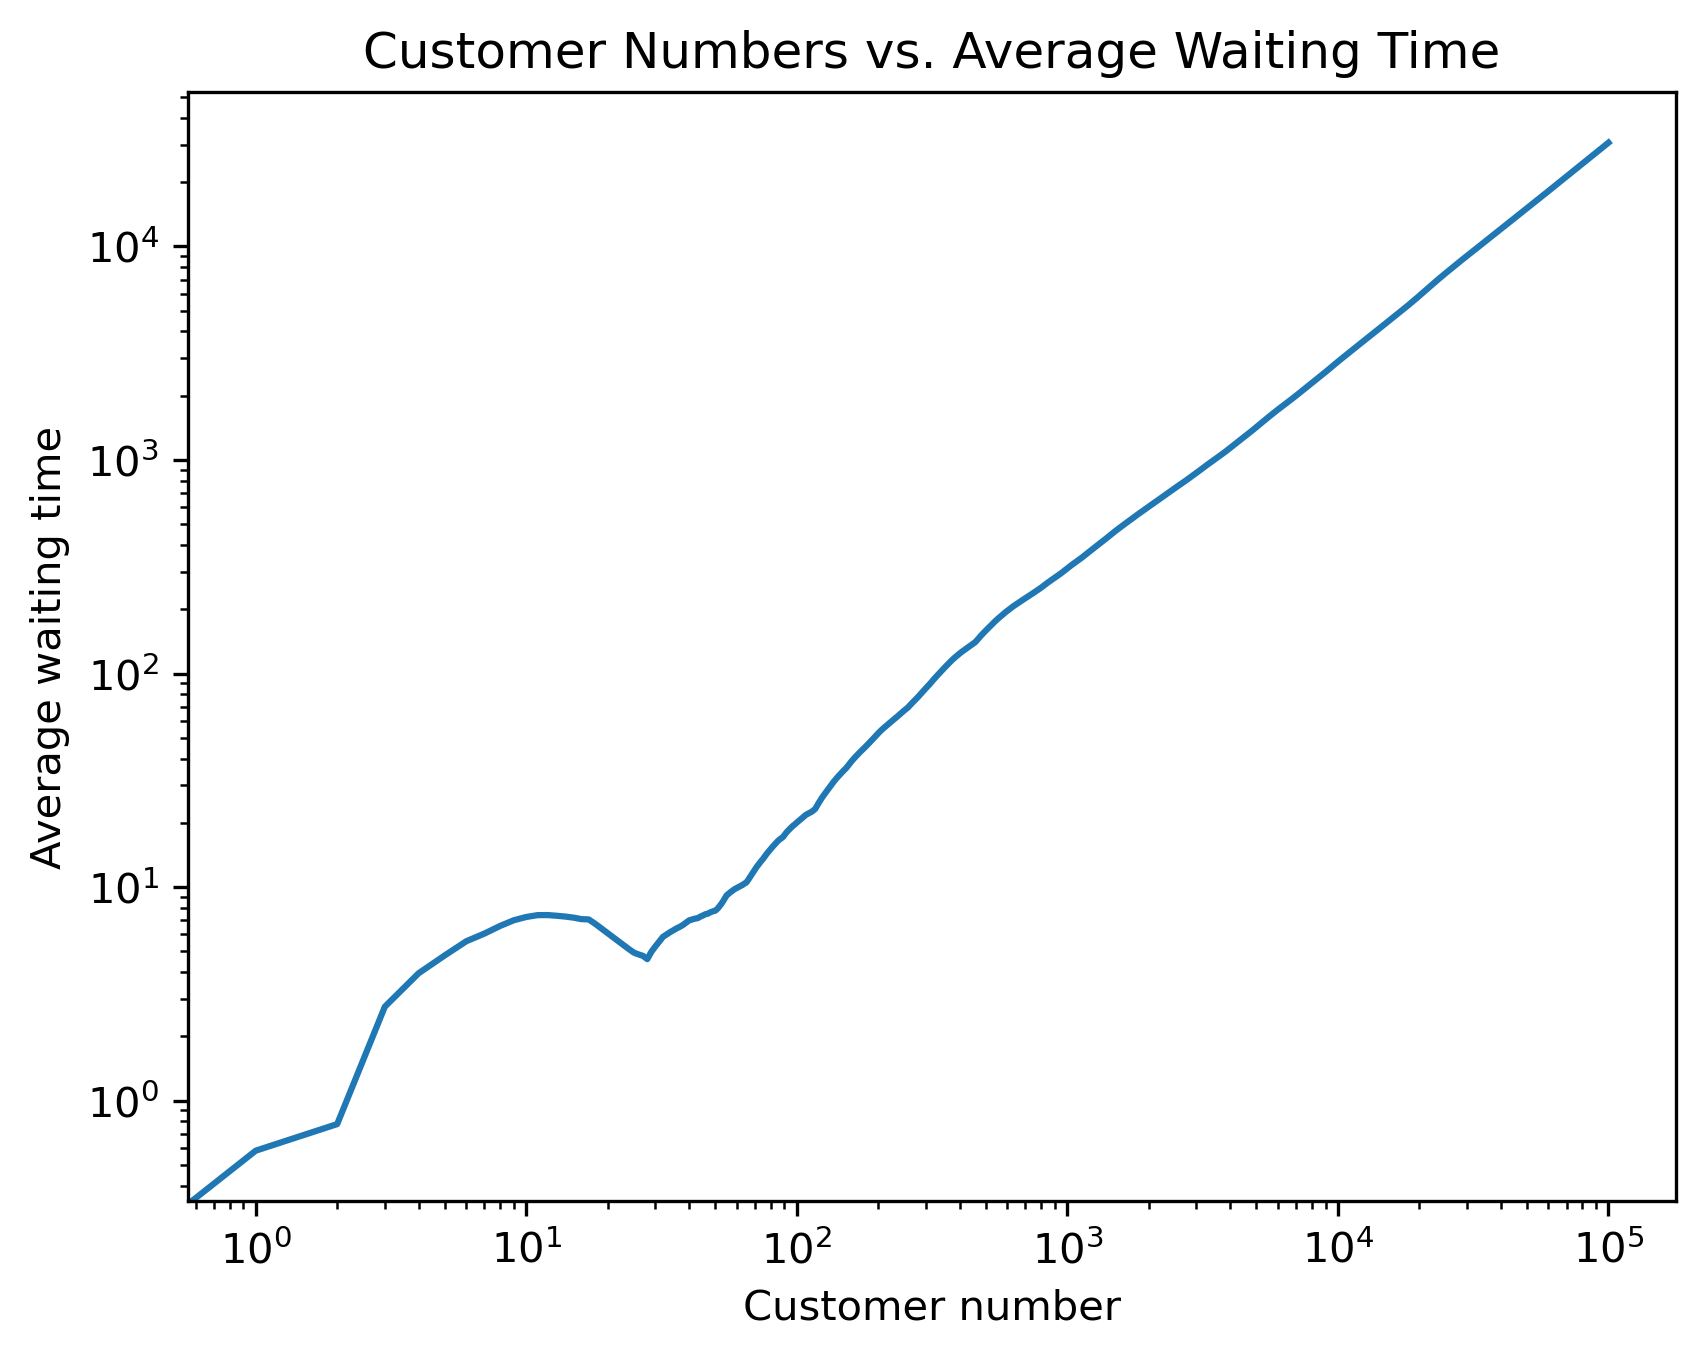

In [4]:
# Simulating for every n
for n in ns:
    # Create figure
    fig, ax = plt.subplots()
    fig.dpi = 300

    # Lists used to store results
    results = []

    # Lists used to store results
    for rho in rhos:
        # Simulate system
        waiting = simulate_MLn(customers, rho, [3, 1/3], 0.75, n)

        # Get average and confidence
        avg, conf = statistics(waiting, print_info=False)

        # Expected waiting time
        expected = expectedWait(rho, mu, n)

        # Add to results
        results.append([avg, conf, expected])

    # Convert to numpy array
    results = np.array(results)

    # Save results
    np.savetxt(f'results/ML{n}.txt', results)

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='M/D/n', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)

    # Loading results from FIFO
    results = np.loadtxt(f'results/MM{n}_FIFO.txt')

    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]

    # Plotting
    ax.plot(rhos, results[:, 0], label='M/M/n', color='blue')
    ax.fill_between(rhos, left, right, color='blue', alpha=0.5)

    # Plot settings
    ax.legend()
    ax.set_title(f'$n = {n}$')
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    fig.tight_layout()

    # Save figure
    fig.savefig(f'results/MLNvsMMN_{n}.jpg', dpi=300)
